In [1]:
#IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
# CARGA DE DATOS
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [58]:
train.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S


In [53]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [54]:
print(train.shape)

(891, 12)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# VARIABLES CATEGÓRICAS
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Charles Eugene",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [20]:
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

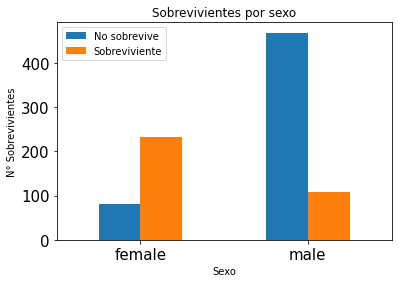

In [43]:
group_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
group_sex.unstack(level=0).plot.bar()
plt.title('Sobrevivientes por sexo')
plt.xlabel('Sexo')
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('N° Sobrevivientes')
plt.yticks(fontsize=15)
plt.legend(labels=['No sobrevive', 'Sobreviviente'])

plt.show()


In [49]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Porcentaje mujeres sobrevivientes:", rate_women*100,"%")

Porcentaje mujeres sobrevivientes: 74.20382165605095 %


In [50]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Porcentaje mujeres sobrevivientes:", rate_men*100, "%")

Porcentaje mujeres sobrevivientes: 18.890814558058924 %


In [51]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [59]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [60]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [61]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [64]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [65]:
train['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [66]:
(train[train['Age'].isna()]
    .groupby(['Sex', 'Pclass'])
    .count()['PassengerId']
    .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [67]:
(train[train['Age'].isna()]
    .groupby(['SibSp', 'Parch'])
    .count()['PassengerId']
    .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [69]:
print(train['Age'].median())

28.0


In [70]:
train['Age'] = train['Age'].fillna(28.0)
train[[]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [71]:
train['Sex'] = train['Sex'].map({'female':1, 'male':0}).astype(int)

In [74]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


In [75]:
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


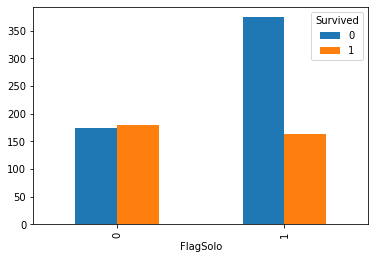

In [81]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [82]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [83]:
Y_train = train['Survived']

features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)


LogisticRegression()

In [90]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [98]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.79


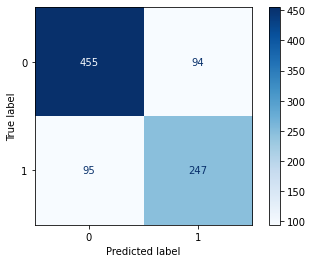

In [99]:
conf_mat_acc(log_reg)

accuracy:  0.89


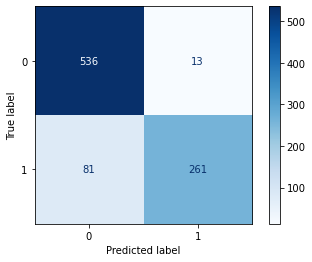

In [100]:
conf_mat_acc(decision_tree)

In [101]:
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [105]:
test['Sex'] = test['Sex'].map({'female':1, 'male':0}).astype(int)
test['Age'] = test['Age'].fillna(28.0)
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)



In [106]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [107]:
X_test = test[features]
print(X_test.shape)

(418, 4)


In [108]:
Y_pred_log = log_reg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [109]:
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [112]:
def download_output(y_pred, name):
    output = pd.DataFrame({'PassengerId': test.PassengerId,
                          'Survived': y_pred})
    output.to_csv(name, index=False)

In [113]:
download_output(Y_pred_log, 'pred_log.csv')
download_output(Y_pred_tree, 'pred_tree.csv')